In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 加載 iris 資料集
iris = load_iris()
X = iris.data
Y = iris.target.reshape(-1, 1)

# 使用 OneHotEncoder 進行標籤的 One-Hot 編碼
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# 分割資料集為訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [29]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))  # 第一層有 10 個神經元，輸入特徵為 4
model.add(Dense(10, activation='relu'))  # 第二層有 10 個神經元
model.add(Dense(3, activation='softmax'))  # 輸出層有 3 個神經元，對應 3 個類別，使用 softmax 激活函數

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.2696 - loss: 2.0470 - val_accuracy: 0.3000 - val_loss: 2.1063
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2090 - loss: 1.8301 - val_accuracy: 0.3000 - val_loss: 2.0174
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0981 - loss: 1.8482 - val_accuracy: 0.2000 - val_loss: 1.9336
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0754 - loss: 1.6551 - val_accuracy: 0.1000 - val_loss: 1.8583
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0225 - loss: 1.7738 - val_accuracy: 0.0000e+00 - val_loss: 1.7855
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0319 - loss: 1.5992 - val_accuracy: 0.0000e+00 - val_loss: 1.7176
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0321 - loss: 1.5899 - val_accuracy: 0.1667 - val_loss: 1.6522
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0294 - loss: 1.5501 - val_accuracy: 0.2000 - v

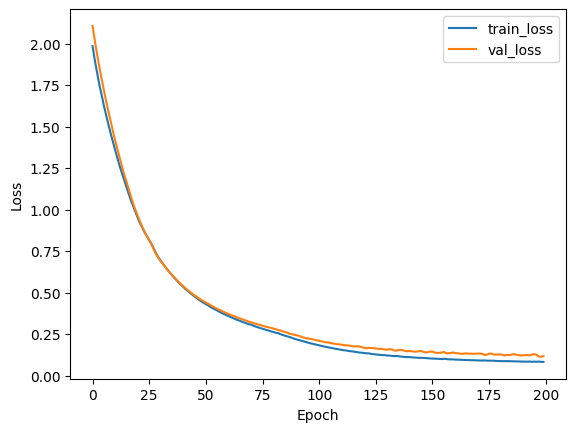

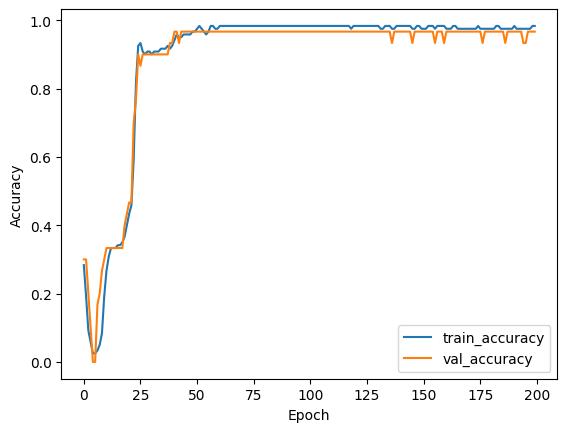

In [30]:
history = model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test))

# 可視化訓練過程
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [31]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9667 - loss: 0.1167
Test accuracy: 0.9667


In [32]:
import numpy as np

# 假設 predictions 和 true_classes 已經定義
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# 確保兩個列表的長度相同
assert len(predicted_classes) == len(true_classes)

# 打印對齊的結果
print("Predicted classes: ", end="")
for i in predicted_classes:
    print(f"{i:2d} ", end="")
print()

print("  True classes:   ", end="")
for i in true_classes:
    print(f"{i:2d} ", end="")
print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted classes:  1  0  2  1  1  0  1  2  2  1  2  0  0  0  0  1  2  1  1  2  0  2  0  2  2  2  2  2  0  0 
  True classes:    1  0  2  1  1  0  1  2  1  1  2  0  0  0  0  1  2  1  1  2  0  2  0  2  2  2  2  2  0  0 


In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

In [34]:
plot_model(model, to_file='ML/MLP.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# 加載 iris 資料集
iris = load_iris()
X = iris.data
Y = iris.target.reshape(-1, 1)

# 使用 OneHotEncoder 進行標籤的 One-Hot 編碼
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# 分割資料集為訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 邏輯回歸模型
logistic_model = Sequential()
logistic_model.add(Dense(3, activation='softmax', input_shape=(4,)))  # 只有輸出層

logistic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
logistic_history = logistic_model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

# 評估模型
Y_pred = logistic_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
logistic_accuracy = accuracy_score(Y_test_classes, Y_pred_classes)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")


Epoch 1/100


c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3081 - loss: 3.6555 - val_accuracy: 0.3667 - val_loss: 3.4173
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3227 - loss: 3.5216 - val_accuracy: 0.3667 - val_loss: 3.3526
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2758 - loss: 3.7098 - val_accuracy: 0.3667 - val_loss: 3.2878
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3081 - loss: 3.4718 - val_accuracy: 0.3667 - val_loss: 3.2236
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3279 - loss: 3.3345 - val_accuracy: 0.3667 - val_loss: 3.1599
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3258 - loss: 3.3023 - val_accuracy: 0.3667 - val_loss: 3.0963
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3144 - loss: 3.1880 - val_accuracy: 0.3667 - val_loss: 3.0329
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3633 - loss: 2.9344 - val_accuracy: 0.3667 - val_loss: 2.9699
Epoc

In [36]:
# 兩層隱藏層的 MLP 模型
mlp_model = Sequential()
mlp_model.add(Dense(50, activation='relu', input_shape=(4,)))  # 第一層隱藏層
mlp_model.add(Dense(30, activation='relu'))                     # 第二層隱藏層
mlp_model.add(Dense(3, activation='softmax'))                    # 輸出層

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
mlp_history = mlp_model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

# 評估模型
Y_pred = mlp_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
mlp_accuracy = accuracy_score(Y_test_classes, Y_pred_classes)

print(f"MLP with 2 Hidden Layers Accuracy: {mlp_accuracy:.4f}")


Epoch 1/100


c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3050 - loss: 1.2309 - val_accuracy: 0.3667 - val_loss: 1.1087
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3154 - loss: 1.0994 - val_accuracy: 0.3667 - val_loss: 1.0212
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5100 - loss: 1.0003 - val_accuracy: 0.4667 - val_loss: 0.9549
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4771 - loss: 0.9378 - val_accuracy: 0.4667 - val_loss: 0.8927
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5248 - loss: 0.8794 - val_accuracy: 0.7000 - val_loss: 0.8322
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6792 - loss: 0.8098 - val_accuracy: 0.7000 - val_loss: 0.7777
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6771 - loss: 0.7658 - val_accuracy: 0.7000 - val_loss: 0.7355
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6623 - loss: 0.7343 - val_accuracy: 0.7000 - val_loss: 0.6985
Epoc

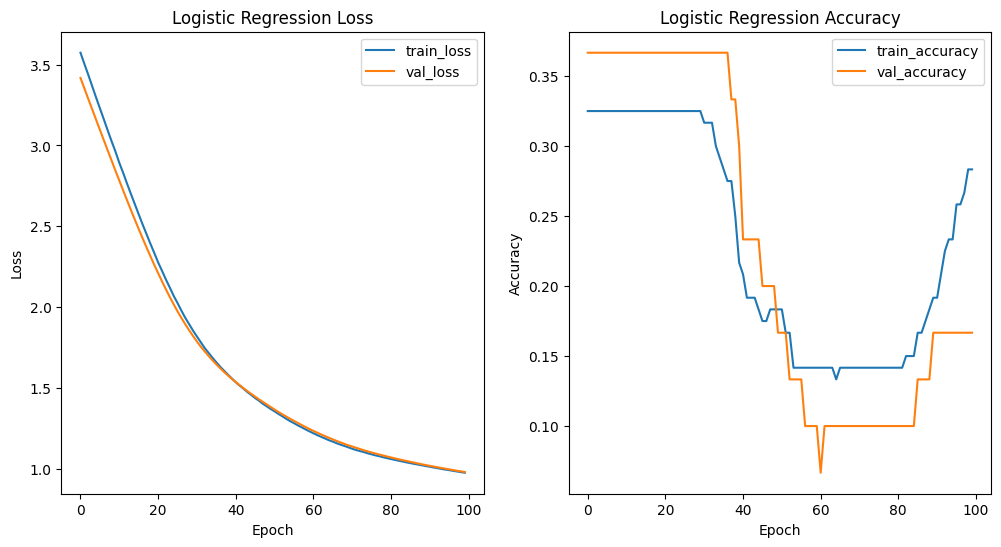

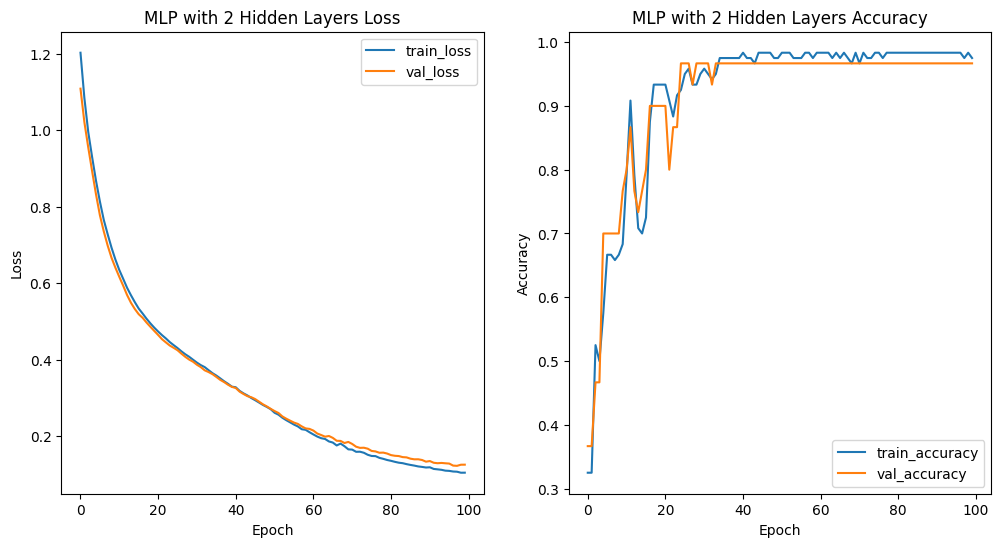

In [37]:
import matplotlib.pyplot as plt

# 邏輯回歸模型訓練過程可視化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(logistic_history.history['loss'], label='train_loss')
plt.plot(logistic_history.history['val_loss'], label='val_loss')
plt.title('Logistic Regression Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(logistic_history.history['accuracy'], label='train_accuracy')
plt.plot(logistic_history.history['val_accuracy'], label='val_accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MLP 模型訓練過程可視化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='train_loss')
plt.plot(mlp_history.history['val_loss'], label='val_loss')
plt.title('MLP with 2 Hidden Layers Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='train_accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='val_accuracy')
plt.title('MLP with 2 Hidden Layers Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 建立 Sequential 模型
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # 第一層，輸入特徵為 10
    Dense(32, activation='relu'),                     # 第二層
    Dense(1, activation='sigmoid')                    # 輸出層，用於二分類問題
])

# 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 概述模型
model.summary()

c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 定義輸入
input1 = Input(shape=(10,))
input2 = Input(shape=(20,))

# 定義層
x1 = Dense(64, activation='relu')(input1)
x2 = Dense(64, activation='relu')(input2)

# 合併層
merged = concatenate([x1, x2])

# 添加後續層
x = Dense(32, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(x)

# 建立模型
model = Model(inputs=[input1, input2], outputs=output)

# 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 概述模型
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │        704 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      1,344 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 32)        │      4,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │         33 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,209 (24.25 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)